# SVM Model

#### What is SVM?

Support Vector Machines (SVM) is a popular supervised learning algorithm in machine learning that is commonly used for classification and regression analysis. SVM tries to find the best possible decision boundary that can separate the data into different classes. It does this by identifying the support vectors, which are the data points closest to the decision boundary. (Google)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

In [3]:
data = pd.read_csv('SMData.csv')
data = data.drop(columns=['Unnamed: 0'])
df = data
data.columns

Index([' Debt ratio %', ' Borrowing dependency', ' Liability to Equity',
       ' Net Income to Stockholder's Equity',
       ' Persistent EPS in the Last Four Seasons',
       ' ROA(C) before interest and depreciation before interest',
       ' Net worth/Assets',
       ' ROA(B) before interest and depreciation after tax',
       ' ROA(A) before interest and % after tax',
       ' Net Income to Total Assets', 'Bankrupt?'],
      dtype='object')

In [4]:
y = pd.DataFrame(data['Bankrupt?'])
x = df.drop(['Bankrupt?'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2023)

In [5]:
SVCModel= SVC(random_state = 2023)
SVCModel.fit(x_train, y_train.values.ravel())
y_pred = SVCModel.predict(x_test)

SVM Classifier Confusion Matrix
Classification Accuracy:  0.8617424242424242
TPR:  0.9021244309559939
FPR:  0.17851739788199697


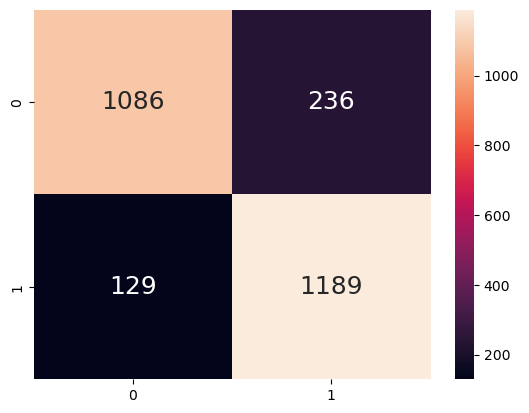

In [6]:
print("SVM Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18})

print("Classification Accuracy: ", SVCModel.score(x_test, y_test))
print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))

In [7]:
print('SVM Test F1 Score: {}'.format(f1_score(y_test,y_pred)))

SVM Test F1 Score: 0.8669340138534452
